# TYCSE - ISE 2 - Component 1
# Machine Learning Model for Diabetes Prediction using Logistic Regression
# TY 47

In [1]:
# Importing Basic Libraries and Model

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading csv file

data = pd.read_csv("diabetes.csv")

In [3]:
# Checking rows and columns of the Dataset

data.shape

(768, 9)

In [4]:
# Features Names

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Verifying Data Distribution

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Splitting Dataset into Features and Labels

X = data.drop(['Outcome'],axis=1) # Independent Fields (all except Outcome)
Y = data['Outcome'] # Dependent Field

In [7]:
# Train - Test Splitting in 80:20 ratio

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2, random_state=1)

In [8]:
# Importing Model

model = LogisticRegression()  

In [9]:
# Checking Parameters of the Model

model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Adjusting Parameters of the Model

model.max_iter = 5000   # Change Iterations from 100 to 5000
model.solver = 'lbfgs'  # Gradient Descent

In [11]:
# Fitting Model on the basis of Training Dataset

model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Storing Predicted Values

pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

In [13]:
# Accuracy of Model

model.score(xtest,ytest)

0.7792207792207793

In [14]:
import matplotlib.pyplot as plt 

#### Visualising

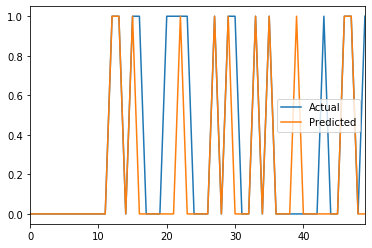

In [15]:
#Comparing Predicted and Actual Class of 1st 50 test values

df = pd.DataFrame({'Actual': np.array(ytest[0:50]).flatten(), 'Predicted': np.array(pred_test[0:50]).flatten()})
df.plot()

#### Evaluating Model

#### Confusion Matrix

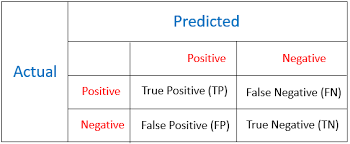

In [16]:
from IPython.display import Image
Image("Confusion_matrix.png")

In [17]:
# Evaluating matrix by using Confusion Matrix 

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(ytest, pred_test)
print("*****Confusion Matrix *****\n{}".format(cnf_matrix))

*****Confusion Matrix *****
[[89 10]
 [24 31]]


In [18]:
# Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(ytest, pred_test))
print("Precision:",metrics.precision_score(ytest, pred_test))
print("Recall:",metrics.recall_score(ytest, pred_test))

Accuracy: 0.7792207792207793
Precision: 0.7560975609756098
Recall: 0.5636363636363636


#### Thank You!!!